In [105]:

from wordcloud import WordCloud, STOPWORDS
import numpy as np;
import matplotlib.pyplot as plt;
%matplotlib inline
import pandas as pd;
from IPython.core.interactiveshell import InteractiveShell;
import seaborn;
import datetime
from ast import literal_eval


In [106]:
InteractiveShell.ast_node_interactivity = "none"
numberOfTable = 6;
finalReaction = pd.DataFrame();
for i in range (numberOfTable) :
    finalReaction = pd.concat([pd.read_csv('./Data/vcslmht_reactions' + str(i) + '.csv' ),finalReaction], ignore_index= True);


In [107]:
finalReaction = finalReaction.drop(columns=['shared_text','original_text','text','timestamp','image','image_lowquality','images',
                                            'images_lowquality','images_lowquality_description','video',
                                            'video_height','video_id','video_quality','video_size_MB','video_thumbnail','video_watches',
                                            'video_width','link','user_id','username','user_url','is_live','factcheck','shared_post_id',
                                            'shared_time','shared_user_id','shared_username','shared_post_url','available','comments_full'
                                            ,'reactors','w3_fb_url','reactions','with','page_id','sharers','image_id','image_ids','was_live','fetched_time',
                                            'video_ids','videos','video_duration_seconds','images_description'])


In [108]:
finalReaction['time'] = pd.to_datetime(finalReaction['time'],format='mixed');
finalReaction.sort_values('time',ignore_index=True,inplace=True);
finalReaction.drop_duplicates('post_id',inplace=True)



In [109]:
def fnc(x):
    if ("'link': '/story.php?" in x[:30]) : return True
    return False


In [110]:
# Tổng hợp các file comments về 1 file

numberOfComments = 4;
finalOnlyComments = pd.DataFrame();
for i in range (numberOfComments) :
    finalOnlyComments = pd.concat([pd.read_csv('./Data/vcslmhtcomments_alternative' + str(i) + '.csv' ),finalOnlyComments], ignore_index= True);


In [111]:

finalOnlyComments = finalOnlyComments[['post_id','comments_text']];


for i in finalOnlyComments['comments_text'] :
    i = literal_eval(i)
    
finalOnlyComments.drop_duplicates('post_id',inplace=True)

finalOnlyComments.dropna(axis=0, how= 'any',inplace=True );

finalCombinedData = pd.merge(finalOnlyComments,finalReaction,on = 'post_id',how='inner')

finalCombinedData.sort_values(by = 'time',inplace=True,ignore_index=True)
finalCombinedData['post_text'] = finalCombinedData['post_text'].apply(lambda x : str(x));
finalCombinedData.to_csv("./DataHandle/finalCombinedData.csv");


finalCombinedData['series_comments_text'] = finalCombinedData['comments_text'].apply(lambda x : x[2:-2].split('\', \''));
finalCombinedData
finalCombinedData['links'] = finalCombinedData['links'].apply(lambda x : fnc(x) )

finalCombinedData

In [112]:
print(finalCombinedData['post_id'][finalCombinedData['reaction_count'] == finalCombinedData['reaction_count'].max()])


244    294941316776532
Name: post_id, dtype: int64


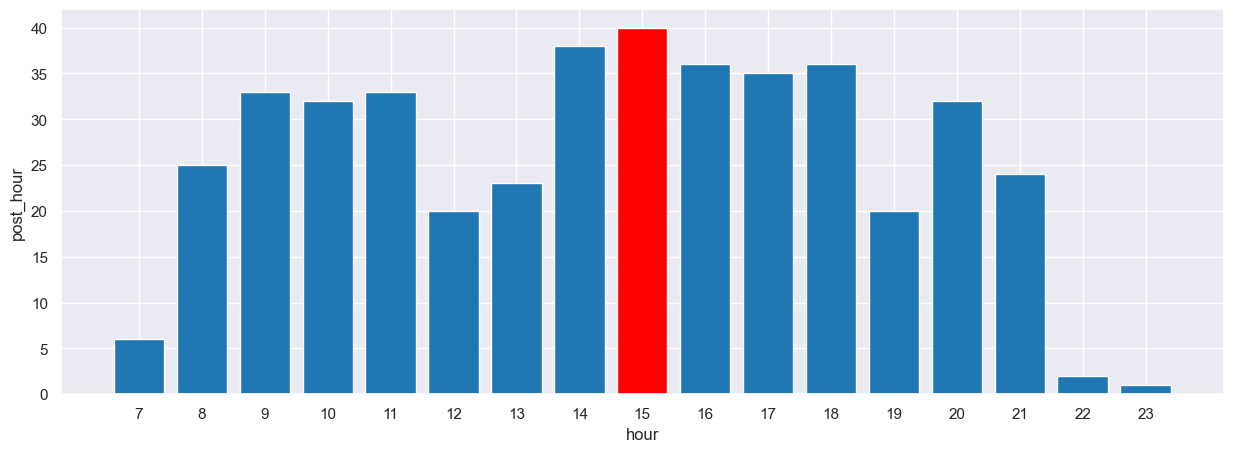

In [113]:

finalCombinedData['hour'] = finalCombinedData['time'].dt.hour
plt.figure(figsize=(15,5));

count = finalCombinedData.value_counts('hour',sort=False).reset_index()
clrs = ['red' if (x == count['hour'][count['count'].idxmax()]) else '#1f77b4' for x in count['hour'] ]

plt.xticks(count['hour'])



plt.bar('hour','count',data=count,color = clrs)
plt.xlabel('hour');
plt.ylabel('post_hour')
type(count['hour'][0])

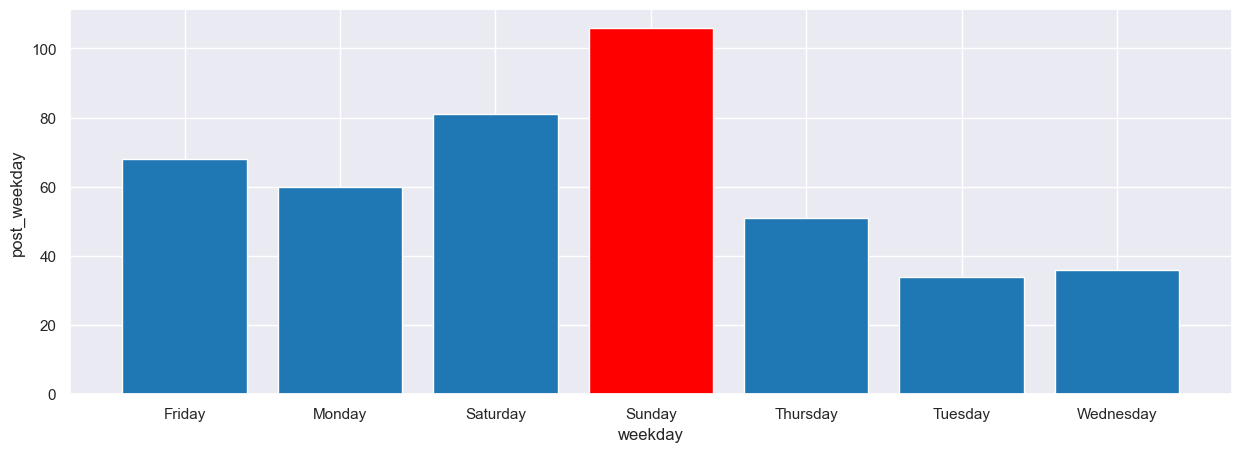

In [114]:

finalCombinedData['weekday'] = finalCombinedData['time'].dt.weekday
week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
finalCombinedData['weekday'] = finalCombinedData['time'].apply(lambda x: week[x.weekday()])
count = finalCombinedData.value_counts('weekday',sort=False).reset_index()
clrs = ['red' if (x == count['weekday'][count['count'].idxmax()]) else '#1f77b4' for x in count['weekday'] ]

plt.figure(figsize=(15,5))

plt.bar('weekday','count',data=count,color = clrs)
plt.xlabel('weekday');
plt.ylabel('post_weekday')

<Figure size 1500x500 with 0 Axes>

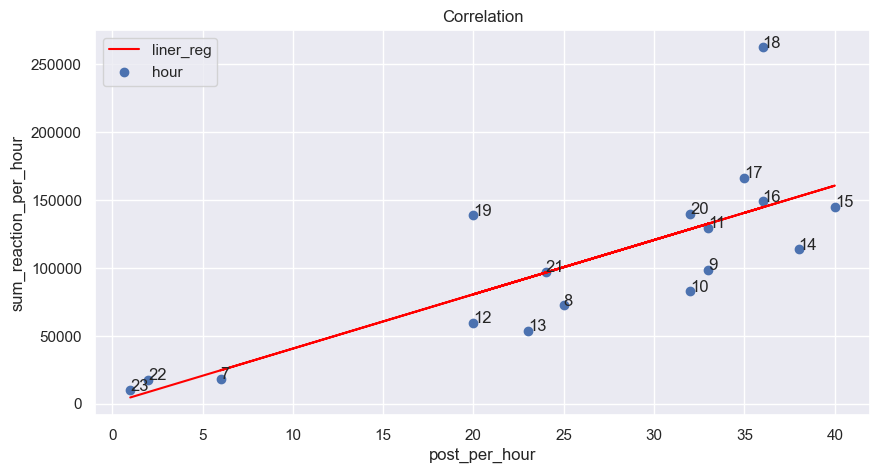

In [115]:
from scipy.stats import linregress
from pylab import * 

fig = plt.figure(figsize= (15,5));


mean_reaction_hour = finalCombinedData[['hour','reaction_count']].groupby('hour').sum('reaction_count').reset_index();
# clrs = ['red' if (x == mean_reaction_hour['hour'][mean_reaction_hour['reaction_count'].idxmax()])   else '#1f77b4' for x in mean_reaction_hour['hour'] ]
plt.figure(figsize=(10,5));

# plt.plot('hour', 'reaction_count',data=mean_reaction_hour,marker = "*")

finalCombinedData['hour'] = finalCombinedData['time'].dt.hour

count = finalCombinedData.value_counts('hour',sort=False).reset_index()

result = pd.merge(count, mean_reaction_hour, how='inner',on='hour')


for index,row in result.iterrows():
    
    plt.annotate(str(int(row.hour)),xy=(row['count'], row.reaction_count));
x = result['count'];
y = result['reaction_count']

m,b = polyfit(x, y, 1) 

plt.plot(x, m*x+b,color = 'red') 
plt.scatter('count','reaction_count',data=result)
# plt.xticks(mean_reaction_hour['hour'])
plt.legend(['liner_reg','hour'])
plt.title("Correlation")
plt.ylabel("sum_reaction_per_hour")
plt.xlabel("post_per_hour")

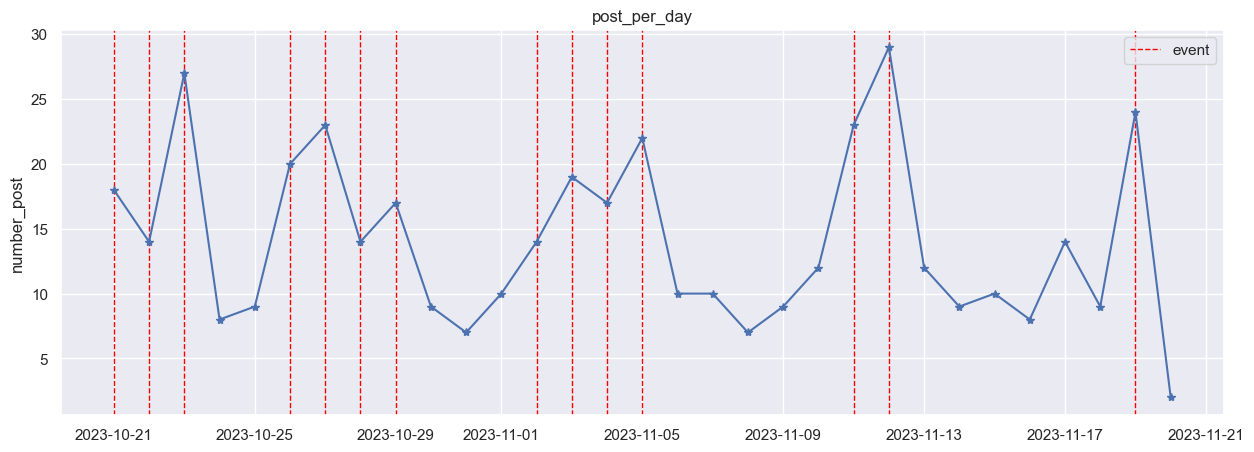

In [116]:
def event_match():
    plt.axvline(x= datetime.date(2023,11,19),color = "red",linestyle  = 'dashed',linewidth = 1)
    # plt.axvline()
    plt.axvline(x= datetime.date(2023,11,11),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,11,12),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,11,2),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,11,3),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,11,4),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,11,5),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,10,29),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,10,26),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,10,27),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,10,28),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,10,21),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,10,22),color = "red",linestyle  = 'dashed',linewidth = 1)

    plt.axvline(x= datetime.date(2023,10,23),color = "red",linestyle  = 'dashed',linewidth = 1)
    return;




finalCombinedData['date'] = finalCombinedData['time'].apply(lambda x : x.date());
dailyPostCount = finalCombinedData['date'].value_counts(sort=False).reset_index();
plt.figure(figsize=(15,5));

# plt.plot('time','reaction_count',data = reaction_count_daily)

event_match()
plt.plot('date','count',data=dailyPostCount,marker = "*")
plt.title("post_per_day")
plt.ylabel("number_post")
# plt.legend(["count"]);
plt.legend(['event'])


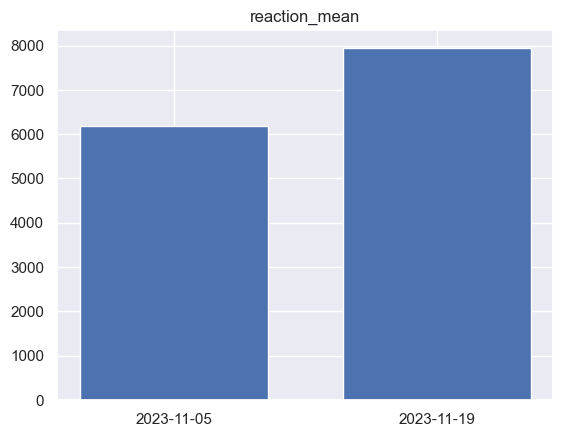

In [117]:
reaction_count_daily = finalCombinedData[['reaction_count','time']].resample('D',on = 'time').mean().reset_index();

chose = [pd.Timestamp(day=5, month=11,year=2023),pd.Timestamp(day=19,month=11,year=2023)]
test = reaction_count_daily['reaction_count'][(reaction_count_daily['time'] == pd.Timestamp(day=5, month=11,year=2023)) | (reaction_count_daily['time'] ==  pd.Timestamp(day=19,month=11,year=2023)) ]

plt.bar(x = chose ,height= test,width=10);
plt.xticks(chose)
plt.title("reaction_mean")

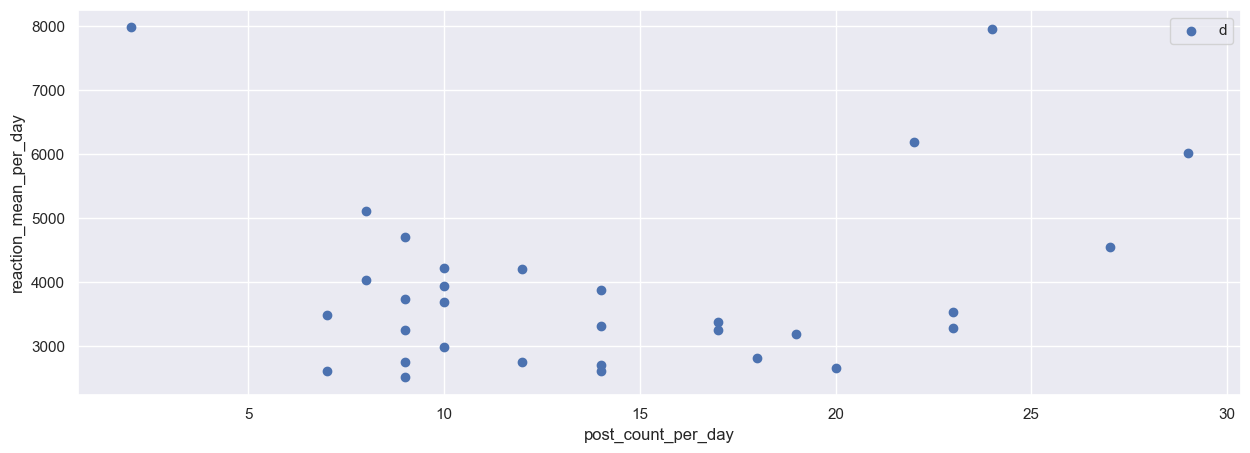

In [118]:
plt.figure(figsize=(15,5));

plt.scatter(dailyPostCount['count'],reaction_count_daily['reaction_count'])
# test =pd.DataFrame();
# test['count'] = dailyPostCount['count'];
# test['reaction_count'] = reaction_count_daily['reaction_count'];
# test[['count','reaction_count']].corr().style.background_gradient(cmap="Blues")
# plt.legend()
plt.xlabel("post_count_per_day");
plt.ylabel("reaction_mean_per_day");
plt.legend("date")

C:\Users\PHAM TIEP\AppData\Local\Temp\ipykernel_26136\2901311644.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pie_type = pd.DataFrame([[test[0],test[1]]],columns=['status','reels'])


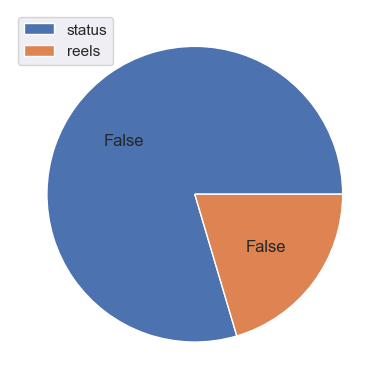

In [119]:



test = finalCombinedData['links'].groupby(finalCombinedData['links'],sort=False).value_counts()
pie_type = pd.DataFrame([[test[0],test[1]]],columns=['status','reels'])
plt.pie(pie_type.loc[0][:],autopct = lambda pct: fnc(pie_type.loc[0][:]))
plt.legend(pie_type.keys(),loc='upper left' )

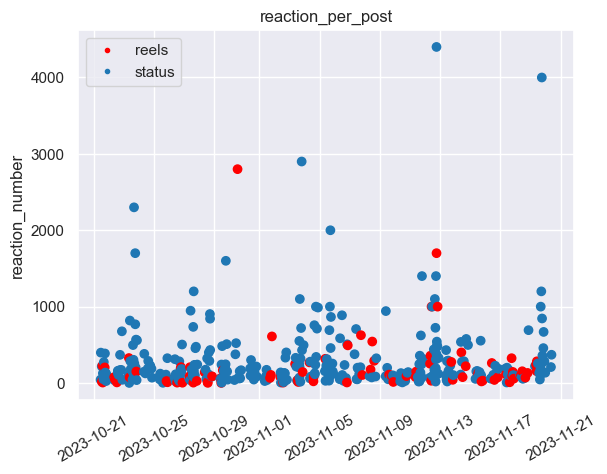

In [120]:

clrs = ['red' if (x) else '#1f77b4' for x in finalCombinedData['links'] ]
plt.scatter(finalCombinedData['time'],finalCombinedData['comments'],color = clrs)
plt.xticks(rotation = 30)
custom = [Line2D([], [], marker='.', color='red', linestyle='None'),
          Line2D([], [], marker='.', color='#1f77b4', linestyle='None')]

plt.legend(handles = custom, labels=['reels', 'status'])
plt.ylabel("reaction_number")
plt.title("reaction_per_post")

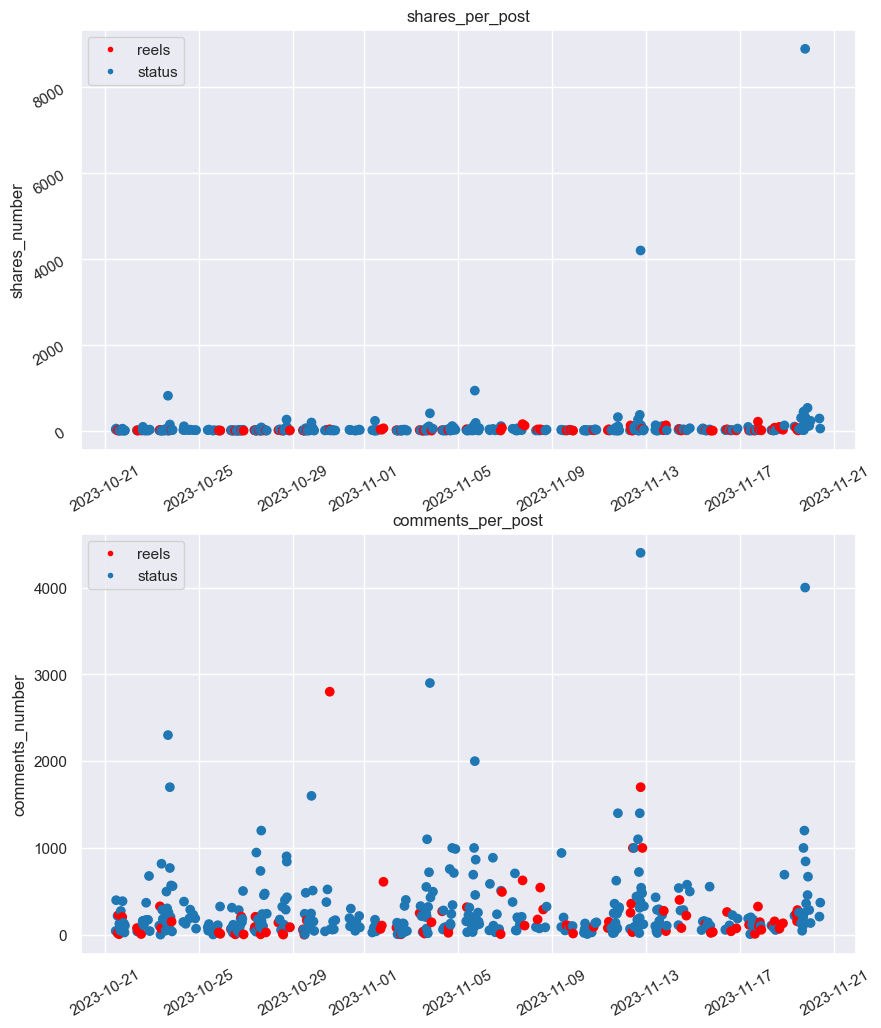

In [121]:

clrs = ['red' if (x) else '#1f77b4' for x in finalCombinedData['links'] ]
# fig, ax = plt.subplots(222)

fig,ax = plt.subplots(nrows=2, ncols=1,figsize = (10,12))


ax[0].scatter(finalCombinedData['time'],finalCombinedData['shares'],color = clrs)

ax[1].scatter(finalCombinedData['time'],finalCombinedData['comments'],color = clrs)

plt.xticks(rotation = 30)
custom = [Line2D([], [], marker='.', color='red', linestyle='None'),
          Line2D([], [], marker='.', color='#1f77b4', linestyle='None')]

ax[0].legend(handles = custom, labels=['reels', 'status'])
ax[1].legend(handles = custom, labels=['reels', 'status'])
ax[1].set_ylabel("comments_number")
ax[1].set_title("comments_per_post")
ax[0].tick_params(labelrotation=30)
# ax[0].ylabel('shares_number');
# ax[0].title("shares_per_post");
ax[0].set_title("shares_per_post")
ax[0].set_ylabel('shares_number')


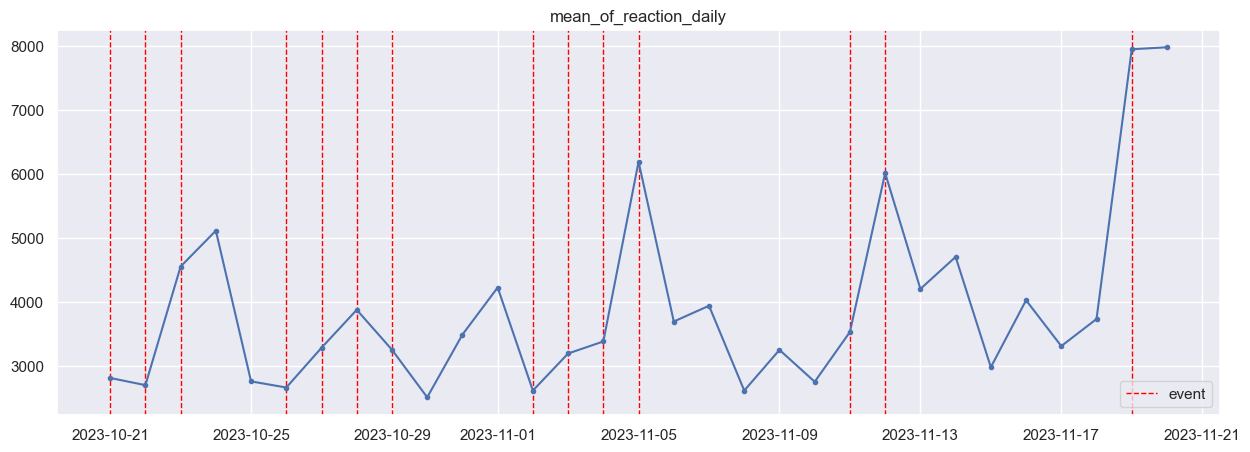

In [122]:
reaction_count_daily = finalCombinedData[['reaction_count','time']].resample('D',on = 'time').mean().reset_index()

plt.figure(figsize=(15,5));
event_match()
plt.plot('time','reaction_count',data = reaction_count_daily,marker=".")
# print(1)

plt.title("mean_of_reaction_daily")
plt.legend(["event"])

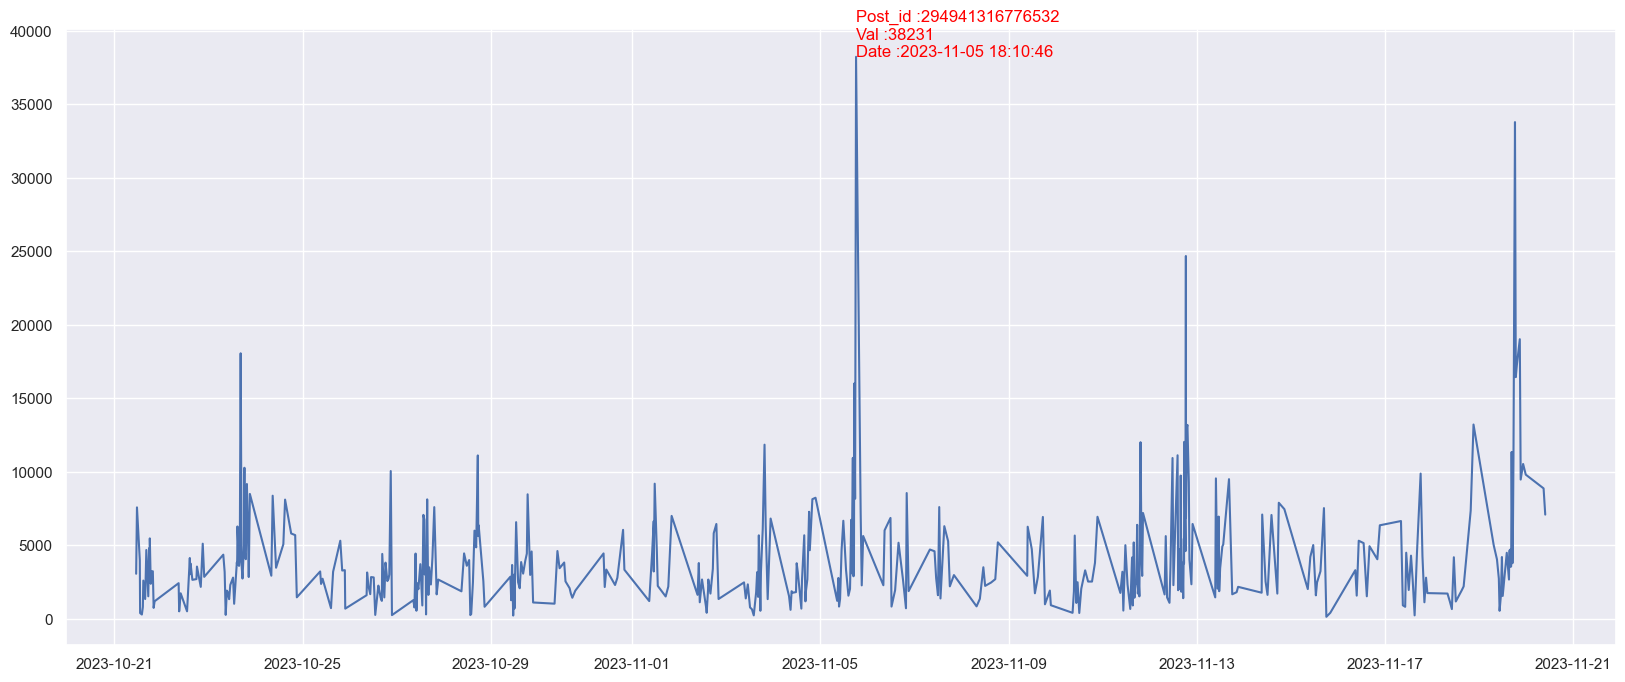

In [123]:
lineReaction = plt.figure(figsize=(20,8));
posX = finalCombinedData['time'][finalCombinedData['reaction_count'].idxmax()];

text = "Post_id :" + str(finalCombinedData['post_id'][finalCombinedData['reaction_count'].idxmax()]) + "\nVal :" + str(finalCombinedData['reaction_count'][finalCombinedData['reaction_count'].idxmax()])  +"\nDate :" + str(posX);
plt.annotate(text , xy = (posX,finalCombinedData['reaction_count'].max()),color = "red")
# event_match()
plt.plot('time','reaction_count',data=finalCombinedData);


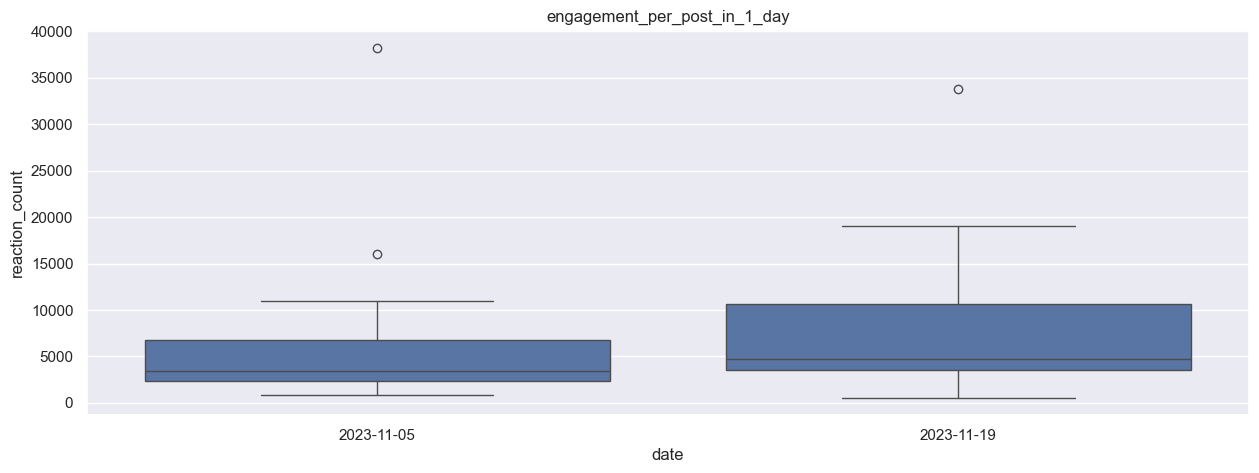

In [124]:

plt.figure(figsize = (15,5))
reaction_5_11 = finalCombinedData[:][finalCombinedData['date'] ==  datetime.date(day=5, month=11,year=2023)]
reaction_19_11 = finalCombinedData[:][finalCombinedData['date'] ==  datetime.date(day=19, month=11,year=2023)]

res = pd.concat([reaction_5_11,reaction_19_11],ignore_index = True);

seaborn.set(style='darkgrid')
seaborn.boxplot(x="date", y="reaction_count", data=res).set_title("engagement_per_post_in_1_day")

# res

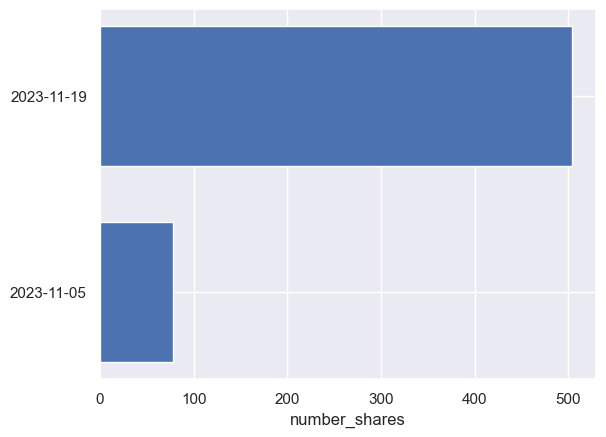

In [125]:
mean_comment_5_19 = res[['comments','time']].resample('14D',on = 'time').mean().reset_index()
mean_share_5_19 = res[['shares','time']].resample('14D',on = 'time').mean().reset_index()

plt.barh(y = mean_share_5_19['time'],width = mean_share_5_19['shares'],data = mean_share_5_19,height = 10)
plt.yticks(mean_share_5_19['time'])
plt.xlabel("number_shares")

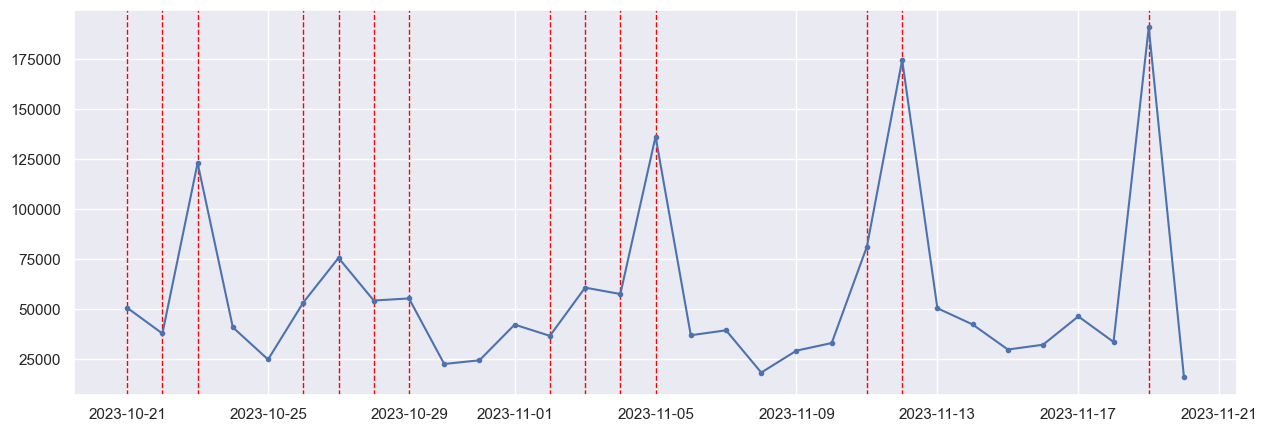

In [126]:


sum_reaction_count_daily = finalCombinedData[['reaction_count','time']].resample('D',on = 'time').sum().reset_index()
sum_reaction_count_daily
plt.figure(figsize=(15,5));
event_match()
plt.plot('time','reaction_count',data = sum_reaction_count_daily,marker=".")





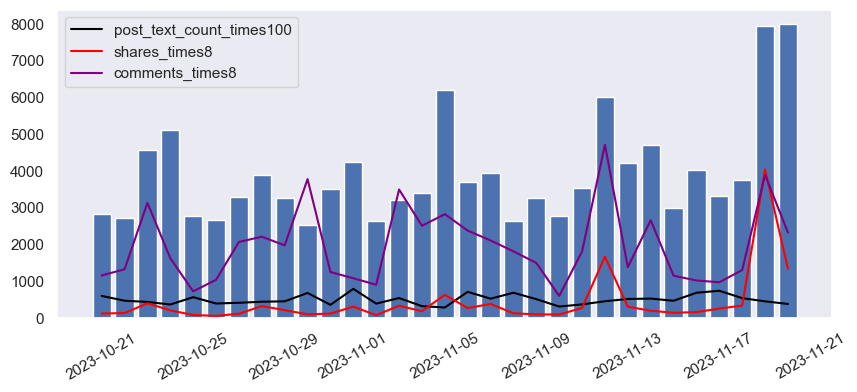

In [127]:
# xử lý 
from functools import reduce


finalCombinedData['post_text_count'] = finalCombinedData['post_text'].apply(lambda x : len(x.split(" ")));
finalCombinedData['post_text_count_times100'] = finalCombinedData['post_text_count'] * 10;
finalCombinedData['shares_times8'] = finalCombinedData['shares']*8;
finalCombinedData['comments_times8'] = finalCombinedData['comments']*8




post_text_count_times100_daily = finalCombinedData[['post_text_count_times100','time']].resample('D',on = 'time').mean().reset_index()
shares_times8_daily = finalCombinedData[['shares_times8','time']].resample('D',on = 'time').mean().reset_index()
comments_times8_daily  = finalCombinedData[['comments_times8','time']].resample('D',on = 'time').mean().reset_index()
reaction_count_daily = finalCombinedData[['reaction_count','time']].resample('D',on = 'time').mean().reset_index()

merge_data = [post_text_count_times100_daily,shares_times8_daily,comments_times8_daily,reaction_count_daily]


df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['time'],
                                            how='inner'), merge_data)

plt.figure(figsize = (10,4));
plt.xticks(rotation=30)
plt.plot('time','post_text_count_times100',data = df_merged,color = "black")
plt.plot('time','shares_times8',data = df_merged,color = "red")
plt.bar('time','reaction_count',data = df_merged)
plt.plot('time','comments_times8',data= df_merged , color = "purple")
plt.grid()
plt.legend()



In [128]:
#Nhìn vào biểu đồ trên ta thấy reaction_count,shares,comments có độ tương quan mật thiết với nhau, trong khi đó số lượng từ trong một post độc lập với 3 thành phần còn lại
finalCombinedData[['post_text_count','reaction_count','shares','comments']].corr().style.background_gradient(cmap="Blues")

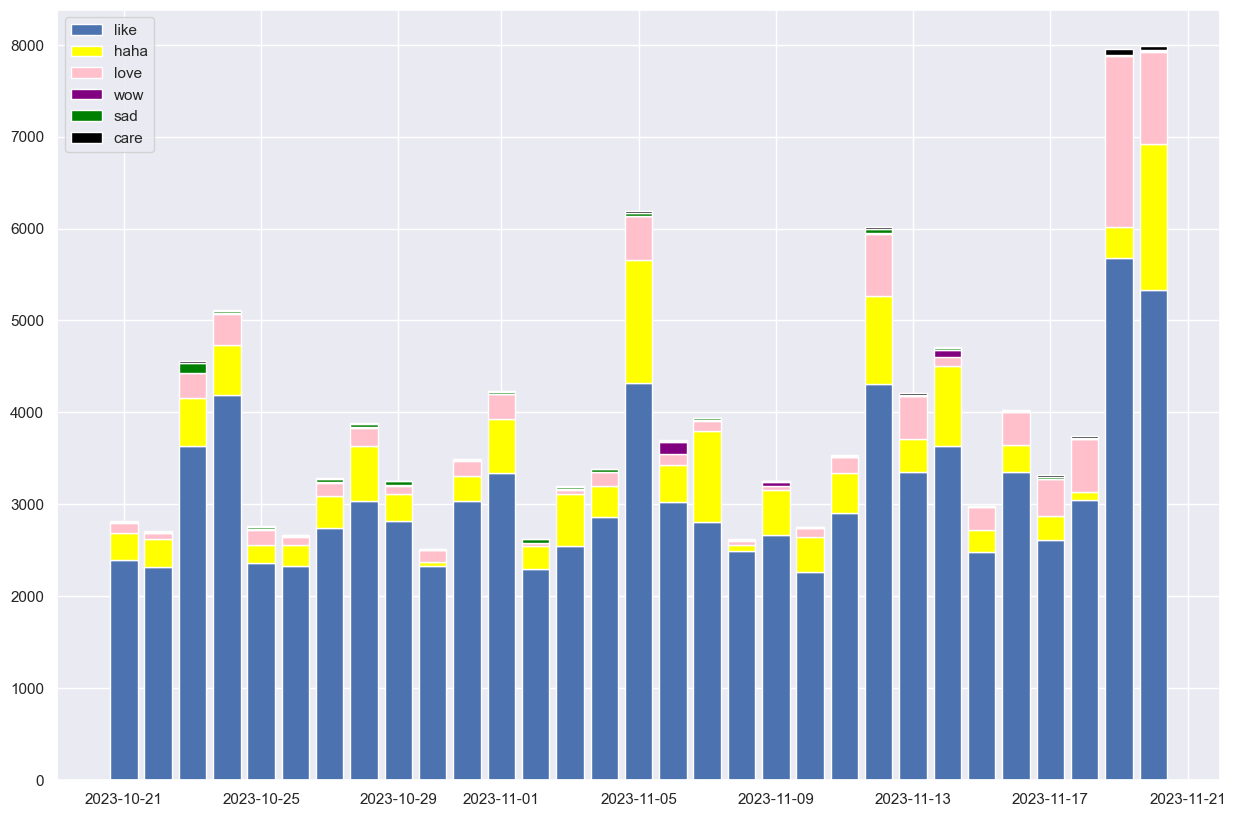

In [129]:
plt.figure(figsize = (15,10))
mean_haha = finalCombinedData[['reactions_haha','time']].resample('D',on = 'time').mean().reset_index()
mean_care = finalCombinedData[['reactions_care','time']].resample('D',on = 'time').mean().reset_index()
mean_love = finalCombinedData[['reactions_love','time']].resample('D',on = 'time').mean().reset_index()
mean_sad = finalCombinedData[['reactions_sad','time']].resample('D',on = 'time').mean().reset_index()
mean_angry = finalCombinedData[['reactions_angry','time']].resample('D',on = 'time').mean().reset_index()
mean_wow = finalCombinedData[['reactions_wow','time']].resample('D',on = 'time').mean().reset_index()
mean_like = finalCombinedData[['reactions_like','time']].resample('D',on = 'time').mean().reset_index()

plt.bar('time','reactions_like',data = mean_like)
plt.bar('time','reactions_haha',bottom = mean_like['reactions_like'],data = mean_haha,color = "yellow")
plt.bar('time','reactions_love',bottom = mean_haha['reactions_haha'] + mean_like['reactions_like'] ,data = mean_love,color = "pink")
plt.bar('time','reactions_wow',bottom = mean_love['reactions_love'] + mean_haha['reactions_haha'] + mean_like['reactions_like'] ,data = mean_wow,color = "purple")
plt.bar('time','reactions_sad',bottom = mean_wow['reactions_wow'] + mean_love['reactions_love'] + mean_haha['reactions_haha'] + mean_like['reactions_like'] ,data = mean_sad,color = "green")
plt.bar('time','reactions_care',bottom =mean_sad['reactions_sad'] + mean_wow['reactions_wow'] + mean_love['reactions_love'] + mean_haha['reactions_haha'] + mean_like['reactions_like'] ,data = mean_care,color = "black")

plt.legend(["like","haha","love","wow","sad","care"])

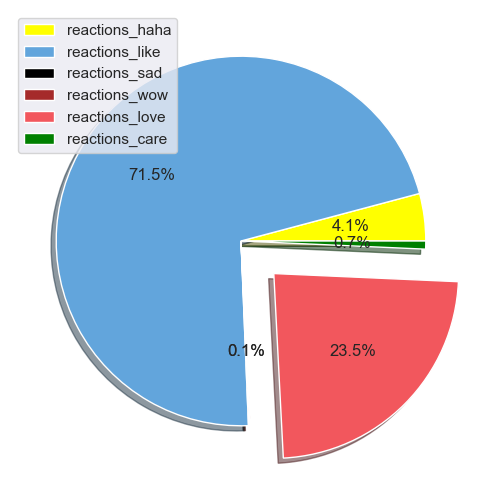

In [130]:
def func(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%".format(pct, absolute)
    
plt.figure(figsize = (6,6))
means_19_11 = finalCombinedData[['reactions_haha','reactions_like','reactions_sad','reactions_wow','reactions_love','reactions_care','time']].resample('D',on = 'time').mean().reset_index()
means_19_11_ = means_19_11[:][means_19_11['time'] == pd.Timestamp(2023,11,19)]
explode = (0.0, 0.0, 0.0, 0.0, 0.25, 0.0)
# means_19_11_ = means_19_11_.loc[:, (means_19_11_ != 0).any(axis=0)]
clrs = ["yellow","#62a5dc","black","brown","#f2575d","green"];
plt.pie(means_19_11_.iloc[0][1:],autopct = lambda pct: func(pct, means_19_11_.iloc[0][1:]),explode = explode,shadow = True ,colors = clrs)
means_19_11_
plt.legend(means_19_11_.iloc[0][1:].keys(),loc='upper left' )


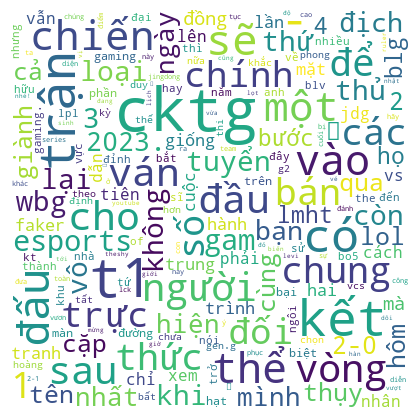

In [131]:
def docs(corpus):
    doc_count = dict()
    isAppear = dict()
    for line in corpus:
        isAppear = dict()
        for word in line.split():
            #you did mistake here
            if(isAppear.get(word,False)):
                continue
            isAppear[word] = True;
            if word in doc_count:
                doc_count[word] +=1
                isAppear[word] = True;
            else:
                isAppear[word] = True;
                doc_count[word] = 1
    doc_count = dict(reversed(sorted(doc_count.items(), key=lambda item: item[1])))
    return doc_count    


DataSortedReaction = finalCombinedData.sort_values(by='reaction_count',ascending = False,ignore_index= True);


LowerDataSorted = DataSortedReaction["post_text"][:100].apply(lambda x : x.lower());

document_count =  docs(LowerDataSorted);


stopwords = ["#vcslmht","#worlds2023","#vươnđỉnhvinhquang","#cktg","#cktg2023","và","của","tại","trong","đã","là","với","2023","đội","những","trước","thắng","tiếp","được","giữa"]


for i in stopwords :
    if(document_count.get(i,0) !=0):
        document_count.pop(i);

wordcloud = WordCloud(background_color="white",max_font_size=60, relative_scaling=.5, width=400, height=400).generate_from_frequencies(document_count)
plt.figure( figsize = (4, 4), facecolor = None)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.tight_layout(pad = 0)


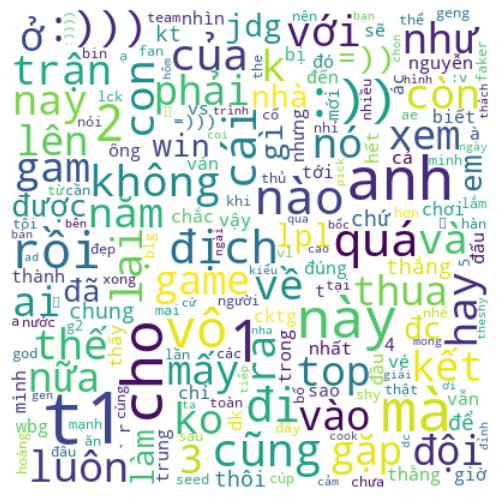

In [132]:
all_comments= list();
for i in finalCombinedData['series_comments_text']:
    for j in i : 
           all_comments.append(j.lower())
document_count_comments = docs(all_comments);


stopwords = ["là","có","đánh","thì"]


for i in stopwords :
    if(document_count_comments.get(i,0) !=0):
        document_count_comments.pop(i);
wordcloud = WordCloud(background_color="white",max_font_size=60, relative_scaling=.5, width=400, height=400).generate_from_frequencies(document_count_comments)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()
